# Basic Contour Plot


In [64]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geocat.viz as gv
import geocat.viz.util as gvutil
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.gridliner import LatitudeFormatter, LongitudeFormatter
from matplotlib import cm
from mpl_toolkits.axes_grid1 import AxesGrid

from metpy.units import units

In [89]:
# open the mean sea level data for any year
#

indir = '/glade/collections/rda/data/ds633.1/e5.moda.an.sfc/2021/'
infile = 'e5.moda.an.sfc.128_151_msl.ll025sc.2021010100_2021120100.nc'
ds  = xr.open_dataset(indir+infile)


# load the slp data and convert to hPa 
#slp = ds.MSL.metpy.quantify().metpy.convert_units('hPa')
slp= ds.MSL.metpy.convert_units('hPa')


In [ ]:
# plot 1 global domain, contour

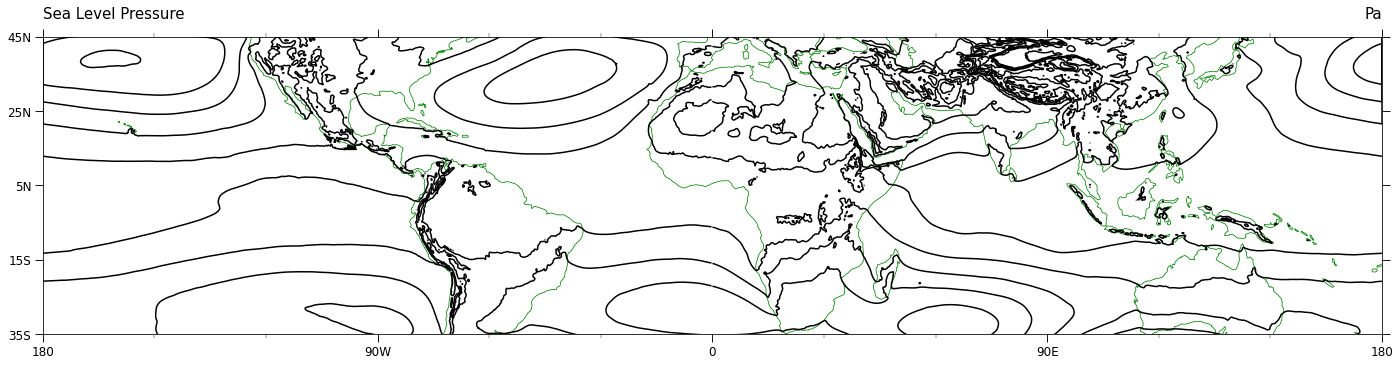

In [96]:
min_lon = -180.
max_lon =  180.
min_lat = -35.
max_lat =  45.
cenLon  = .5*(min_lon + max_lon )

# sea level in hPa
levels = np.arange(940,1080,4)

fig = plt.figure(figsize=(24,8))

    # Generate axes, using Cartopy, drawing coastlines, and adding features
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.coastlines(linewidths=0.75, color='green')



# Create a dictionary for common plotting options
plot_options = dict(    transform=projection,  # ds projection
    add_labels=False,  # turn off xarray's automatic Lat, lon labels
    colors="black",  # note plurals in this and following kwargs
    linestyles="-",
    linewidths=1.5, levels=levels)

ct= slp[6,:,:].plot.contour(ax=ax, **plot_options)

# Use geocat.viz.util convenience function to set axes limit
gvutil.set_axes_limits_and_ticks(ax,
                                xlim=(min_lon, max_lon),
                                ylim=(min_lat, max_lat),
                                xticks=np.linspace(min_lon,max_lon, 5),
                                yticks=np.linspace(min_lat,max_lat, 5))





# Use geocat.viz.util convenience function to add major tick lines
gvutil.add_major_minor_ticks(ax, y_minor_per_major=1, labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gvutil.add_lat_lon_ticklabels(ax)

# Remove degree symbol from tick label
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))

# Use geocat.viz.util convenience function to set titles and labels


gvutil.set_titles_and_labels(ax,
                                 righttitle="Pa",
                                 righttitlefontsize=15,
                                 lefttitle="Sea Level Pressure",
                                 lefttitlefontsize=15,
                                 xlabel="",
                                 ylabel="")



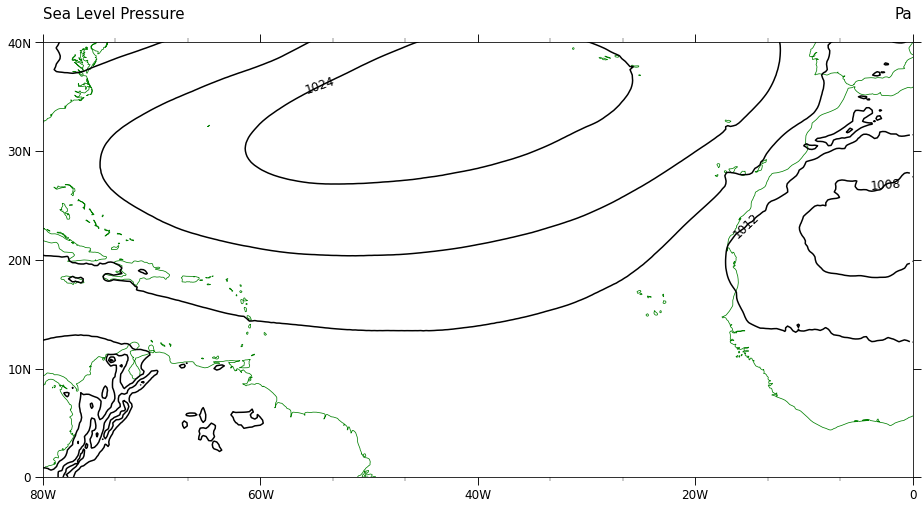

In [113]:





min_lon = -80.
max_lon = 0.
min_lat = 0.
max_lat =  40.
cenLon  = .5*(min_lon + max_lon )


levels = np.arange(960,1080,4)


fig = plt.figure(figsize=(24,8))

    # Generate axes, using Cartopy, drawing coastlines, and adding features
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.coastlines(linewidths=0.75, color='green')



# Create a dictionary for common plotting options
plot_options = dict(    transform=projection,  # ds projection
    add_labels=False,  # turn off xarray's automatic Lat, lon labels
    colors="black",  # note plurals in this and following kwargs
    linestyles="-",
    linewidths=1.5, levels=levels, clabel=levels)

ct=slp[6,:,:].plot.contour(ax=ax, **plot_options)

# cntour labels
ax.clabel(ct, ct.levels, inline=False, fontsize=12, fmt="%.0f")

# Use geocat.viz.util convenience function to set axes limit
gvutil.set_axes_limits_and_ticks(ax,
                                xlim=(min_lon, max_lon),
                                ylim=(min_lat, max_lat),
                                xticks=np.linspace(min_lon,max_lon, 5),
                                yticks=np.linspace(min_lat,max_lat, 5))





# Use geocat.viz.util convenience function to add major tick lines
gvutil.add_major_minor_ticks(ax, y_minor_per_major=1, labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gvutil.add_lat_lon_ticklabels(ax)

# Remove degree symbol from tick label
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))
# Use geocat.viz.util convenience function to set titles and labels

gvutil.set_titles_and_labels(ax,
                                 righttitle="Pa",
                                 righttitlefontsize=15,
                                 lefttitle="Sea Level Pressure",
                                 lefttitlefontsize=15,
                                 xlabel="",
                                 ylabel="")


In [ ]:
# filled contour

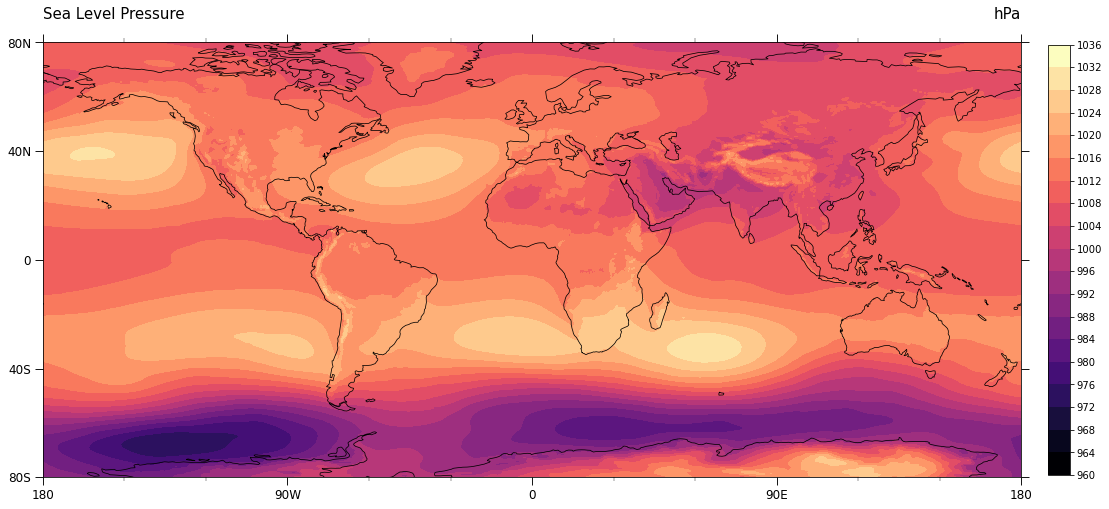

In [108]:
min_lon = -180.
max_lon = 180.
min_lat = -80.
max_lat = 80.
cenLon  = .5*(min_lon + max_lon )

Cmin=960
Cmax=1040
Cint=4
levels = np.arange(Cmin,Cmax,Cint)


fig = plt.figure(figsize=(24,8))

    # Generate axes, using Cartopy, drawing coastlines, and adding features
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.coastlines(linewidths=0.75, color='black')



# Create a dictionary for common plotting options
plot_options = dict(    transform=projection,  # ds projection
    add_labels=False,  # turn off xarray's automatic Lat, lon labels
    linestyles="-",
    levels=levels, cmap='magma', extend='neither', add_colorbar=False)

ct=slp[6,:,:].plot.contourf(ax=ax, **plot_options)

# Use geocat.viz.util convenience function to set axes limit
gvutil.set_axes_limits_and_ticks(ax,
                                xlim=(min_lon, max_lon),
                                ylim=(min_lat, max_lat),
                                xticks=np.linspace(min_lon,max_lon, 5),
                                yticks=np.linspace(min_lat,max_lat, 5))





# Use geocat.viz.util convenience function to add major tick lines
gvutil.add_major_minor_ticks(ax, y_minor_per_major=1, labelsize=12)

# Use geocat.viz.util convenience function to add lat and lon tick labels
gvutil.add_lat_lon_ticklabels(ax)

# Remove degree symbol from tick label
ax.yaxis.set_major_formatter(LatitudeFormatter(degree_symbol=''))
ax.xaxis.set_major_formatter(LongitudeFormatter(degree_symbol=''))
# Use geocat.viz.util convenience function to set titles and labels

gvutil.set_titles_and_labels(ax,
                                 righttitle="hPa",
                                 righttitlefontsize=15,
                                 lefttitle="Sea Level Pressure",
                                 lefttitlefontsize=15,
                                 xlabel="",
                                 ylabel="")



# Add color bar
cbar_ticks = np.arange(Cmin,Cmax,Cint)
cbar = plt.colorbar(ct,
                    orientation='vertical',
                    shrink=0.99,
                    pad=0.02,
                    extendrect=True,
                    ticks=cbar_ticks)

cbar.ax.tick_params(labelsize=10)